# MM20B007 DAL Assignment 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
train = pd.read_excel('/content/drive/MyDrive/sem 7/EE5708/Assignment 2/train.xlsx')
test = pd.read_excel('/content/drive/MyDrive/sem 7/EE5708/Assignment 2/test.xlsx')

### Exploratory Data Analysis and Feature Generation

The given data has 891 datapoints corresponding to each of the 12 features.

In [3]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<ipython-input-4-3dc8cfd081d0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True, annot_kws={"size": 14}, cmap = 'YlGnBu')


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'PassengerId'),
  Text(0, 1.5, 'Survived'),
  Text(0, 2.5, 'Pclass'),
  Text(0, 3.5, 'Age'),
  Text(0, 4.5, 'SibSp'),
  Text(0, 5.5, 'Parch'),
  Text(0, 6.5, 'Fare')])

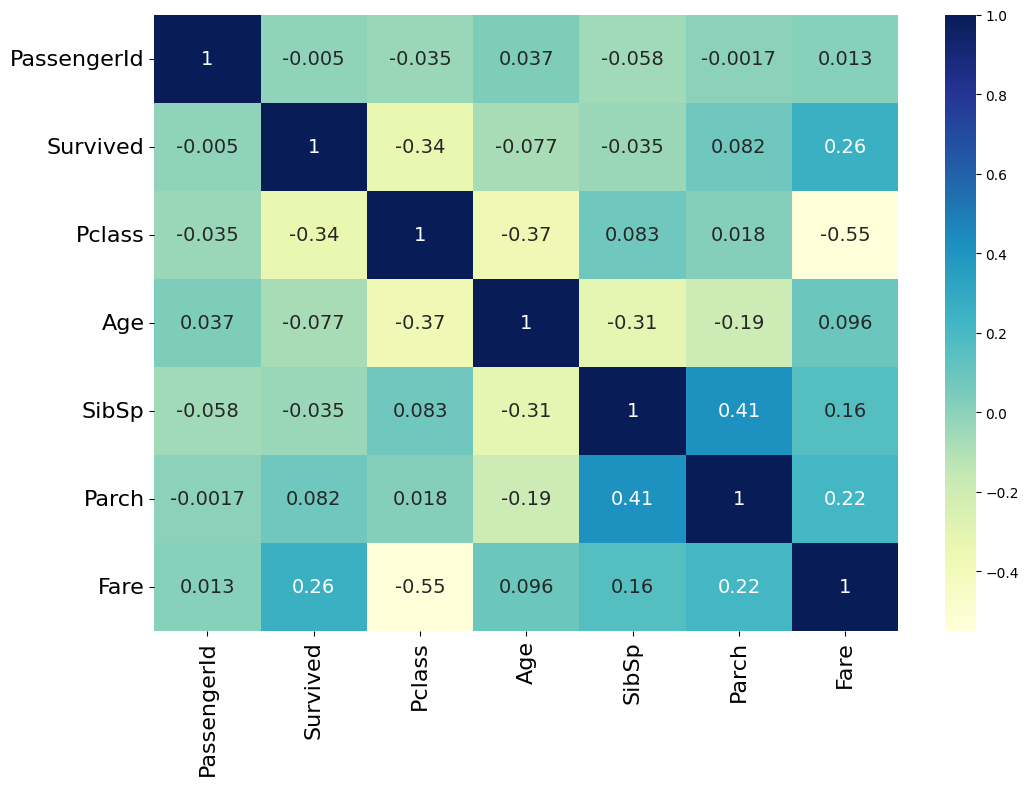

In [4]:
plt.figure(figsize = (12, 8))
sns.heatmap(train.corr(), annot = True, annot_kws={"size": 14}, cmap = 'YlGnBu')
plt.xticks(fontsize = 16, rotation = 90)
plt.yticks(fontsize = 16, rotation = 0)

### Checking the percentage survivals

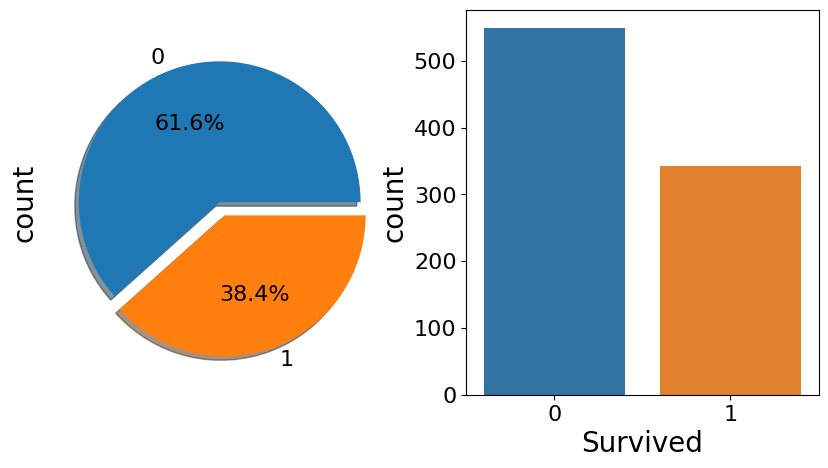

In [5]:
f,ax=plt.subplots(1,2,figsize=(10,5))
train['Survived'].value_counts().plot.pie(ax = ax[0], explode=[0,0.1],autopct='%1.1f%%',shadow=True, textprops={'fontsize': 16})
ax[0].set_ylabel('count')

sns.countplot(x = 'Survived',data = train, ax=ax[1])

for a in ax:
    a.tick_params(axis='both', which='major', labelsize=16)
    a.set_xlabel(a.get_xlabel(), fontsize=20)
    a.set_ylabel(a.get_ylabel(), fontsize=20)

plt.show()

In [6]:
df = train

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


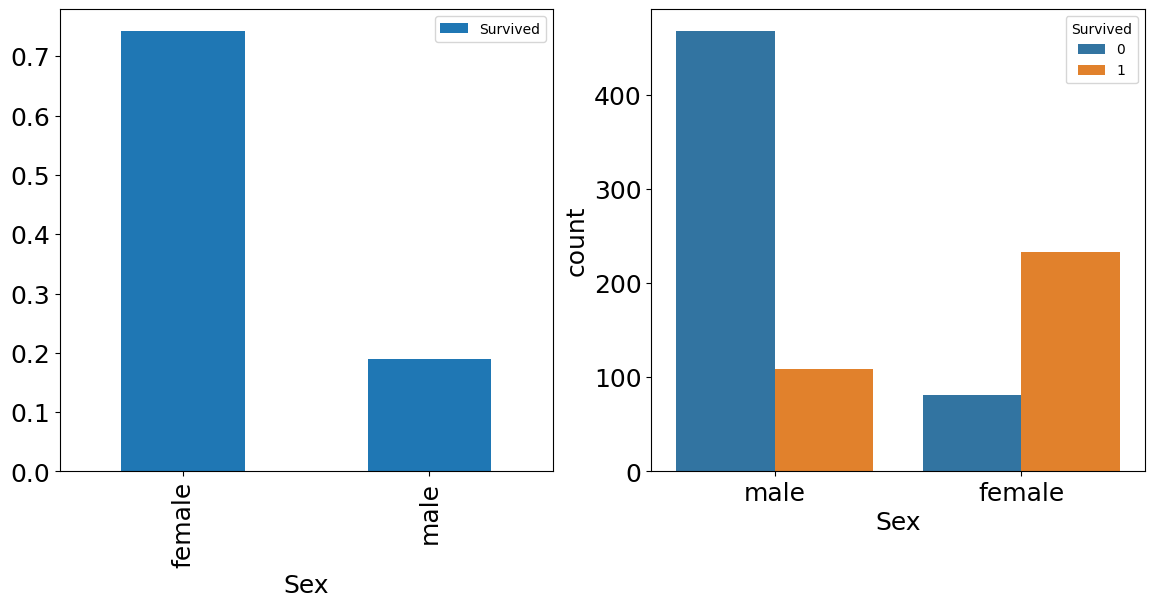

In [8]:
f, ax = plt.subplots(1, 2, figsize = (14, 6))
data = train
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
sns.countplot(x = 'Sex', hue='Survived', data = data, ax=ax[1])

for a in ax:
    a.tick_params(axis='both', which='major', labelsize=18)
    a.set_xlabel(a.get_xlabel(), fontsize=18, rotation = 0)
    a.set_ylabel(a.get_ylabel(), fontsize=18, rotation = 90)

plt.show()

From the barplot male are much less likely to survive (~20%) than female (with a survival chance of ~70%).

Text(0.5, 1.0, 'Ticket frequency VS Survival')

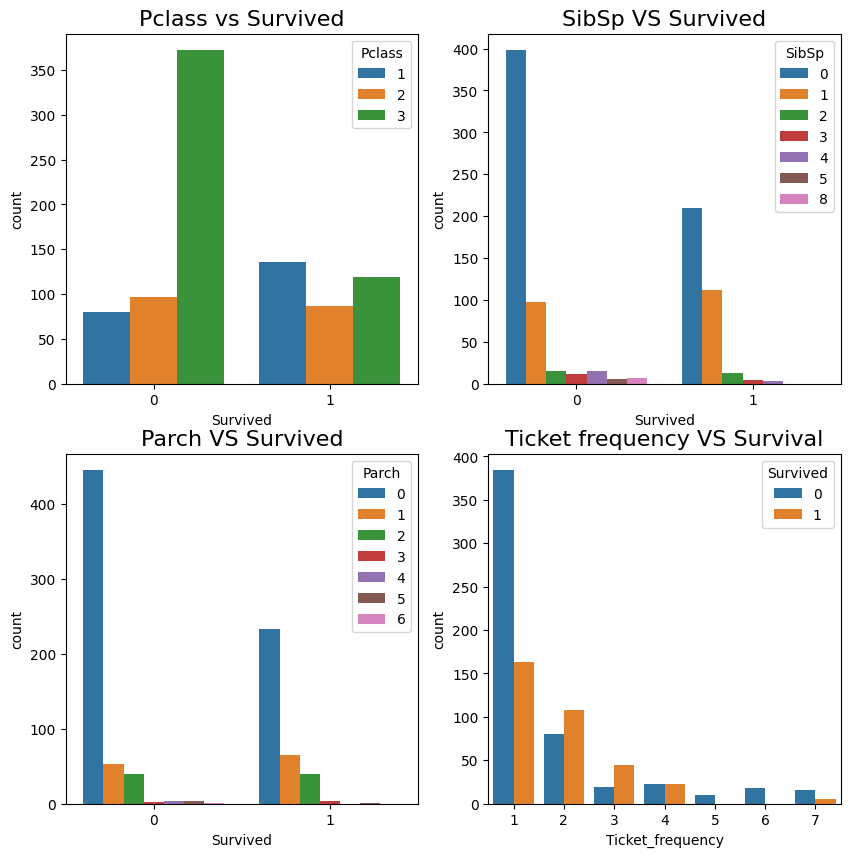

In [9]:
# Defining the frequency of each ticket
df['Ticket_frequency'] = df.groupby('Ticket')['Ticket'].transform('count')

f, ax = plt.subplots(2, 2, figsize = (10, 10))
sns.countplot(x = 'Survived', data = df,hue = 'Pclass', ax = ax[0, 0])
ax[0, 0].set_title('Pclass vs Survived', fontsize = 16)
sns.countplot(x = 'Survived', data = df, hue = 'SibSp', ax = ax[0, 1])
ax[0, 1].set_title('SibSp VS Survived', fontsize = 16)
sns.countplot(x = 'Survived', data = df, hue = 'Parch', ax = ax[1, 0])
ax[1, 0].set_title('Parch VS Survived', fontsize = 16)
sns.countplot(x = 'Ticket_frequency', data = df, hue = 'Survived', ax = ax[1, 1])
ax[1, 1].set_title('Ticket frequency VS Survival', fontsize = 16)

1. Most of the people are from class 3 and have lowest survival chance, whereas passangers from class 1 and 2 have better chances.

2. From SibSp vs Survived and Parch vs Survived it is clear that about ~70% passengers are alone and person with single partner has better chance of surviving (similar to rose and jack). But it need more refinement.

3. On careful observation we see that different ticket frequency has different rates of survival with the highest being for the group of two and the chance for groups of more than 4 being very less.

#### Role of Fare price

<ipython-input-10-724327ff15fe>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Fare, ax = ax[0])


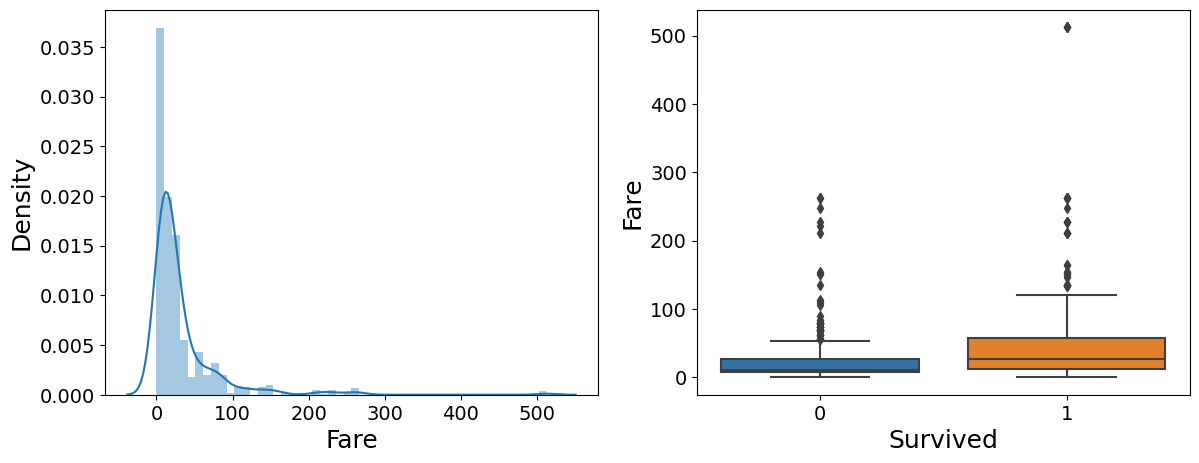

In [10]:
f, ax = plt.subplots(1, 2, figsize = (14, 5))

sns.distplot(df.Fare, ax = ax[0])
# ax[0].set_title('Density Distribution of Fare', fontsize = 18)

sns.boxplot(x = 'Survived', y = 'Fare', data = df, ax = ax[1])
# ax[1].set_title('Fare vs Survived', fontsize = 18)

for a in ax:
    a.tick_params(axis='both', which='major', labelsize=14)
    a.set_xlabel(a.get_xlabel(), fontsize=18)
    a.set_ylabel(a.get_ylabel(), fontsize=18)

We see that there are people paying too much for their tickets (outliers) and people with higher fares are more likely to survive!

Checking family size because it plays a pivotal role in the survival.

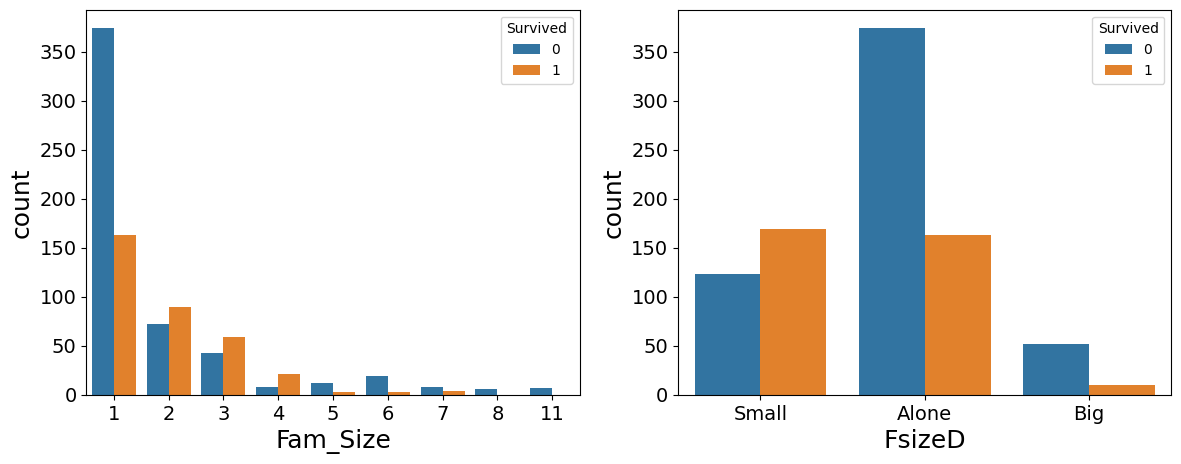

In [11]:
df['Fam_Size'] = df['Parch'] + df['SibSp'] + 1

f, ax = plt.subplots(1, 2, figsize = (14, 5))
sns.countplot(x = 'Fam_Size', data = df, hue = 'Survived', ax = ax[0])
# ax[0].set_title('Family Size VS Survival', fontsize = 18)

# Creating the classes in Fam_size
df.loc[:,'FsizeD']='Alone'
df.loc[(df['Fam_Size']>1),'FsizeD']='Small'
df.loc[(df['Fam_Size']>4),'FsizeD']='Big'

sns.countplot(x='FsizeD',data=df,hue='Survived', ax = ax[1])
# ax[1].set_title('Family Type VS Survival', fontsize = 18)

for a in ax:
    a.tick_params(axis='both', which='major', labelsize=14)
    a.set_xlabel(a.get_xlabel(), fontsize=18)
    a.set_ylabel(a.get_ylabel(), fontsize=18)

We see that people with small family size have the highest chance of Surviving, and the ones with a big family, which the lease chance !

The above barplot suggest the same result inspite of the fact that most of the were single passengers their surivival rate is much lower than people with small family.

### Handling the Missing Data

In [12]:
train.info()
train.isna().sum()/train.shape[0]*100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               714 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             204 non-null    object 
 11  Embarked          889 non-null    object 
 12  Ticket_frequency  891 non-null    int64  
 13  Fam_Size          891 non-null    int64  
 14  FsizeD            891 non-null    object 
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ KB


PassengerId          0.000000
Survived             0.000000
Pclass               0.000000
Name                 0.000000
Sex                  0.000000
Age                 19.865320
SibSp                0.000000
Parch                0.000000
Ticket               0.000000
Fare                 0.000000
Cabin               77.104377
Embarked             0.224467
Ticket_frequency     0.000000
Fam_Size             0.000000
FsizeD               0.000000
dtype: float64

Out of the 12 features Age, Cabin, and Embarked have the missing datapoints.

  a. Age has 19.8 % data missing.

  b. Cabin has 77.1 % data missing.

  c. Embarked has 0.22 % data missing.

<Axes: >

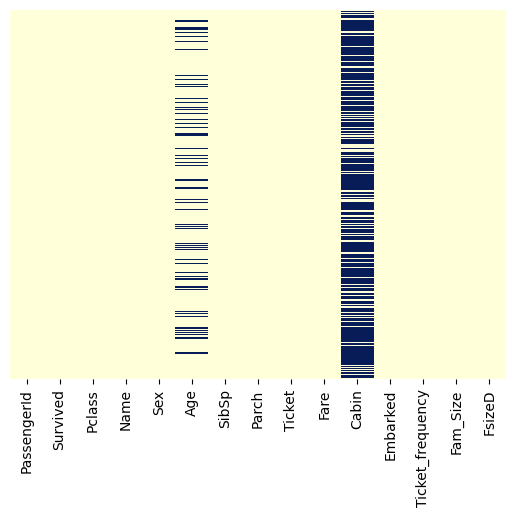

In [13]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'YlGnBu')
# plt.title('Heatmap of Missing data', fontsize = 16)

####  Handling Age Data

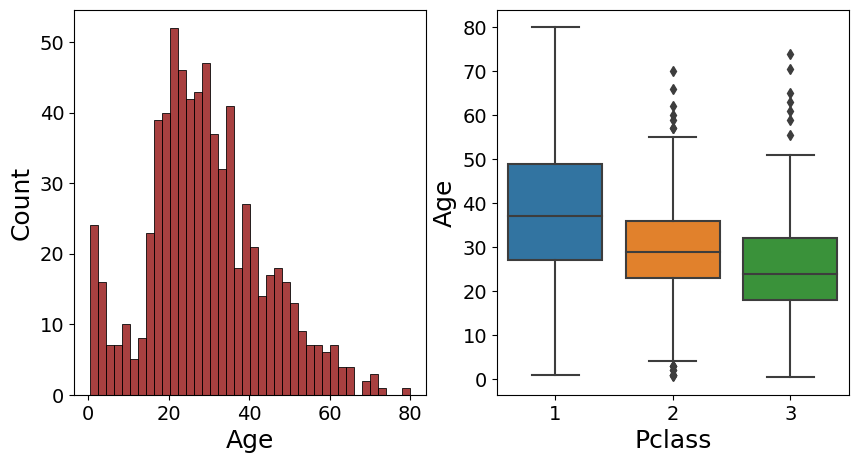

In [14]:
f, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.histplot(df.Age.dropna(), kde=False, color='darkred', bins=40, ax = ax[0])
# ax[0].set_title('Distribution of Age data', fontsize = 16)

sns.boxplot(x = 'Pclass', y = 'Age', data = df, ax = ax[1])
# ax[1].set_title('Age vs Pclass', fontsize  = 16)

for a in ax:
    a.tick_params(axis='both', which='major', labelsize=14)
    a.set_xlabel(a.get_xlabel(), fontsize=18)
    a.set_ylabel(a.get_ylabel(), fontsize=18)

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).

From the correlation heatmap we can see that age has good absolute correlation with Pclass, SblSp, and Parch.

Hypothesis:
1. We will be looking to the name because if a family member survived than there are chances that the others will also survive.
2. We will be looking at the titles as well because survival rate changes with title.
<!-- 3. Grouped ticket because the same ticket will be shared among the family group as well as the friends group. -->

Text(0.5, 1.0, 'Suvived vs Title')

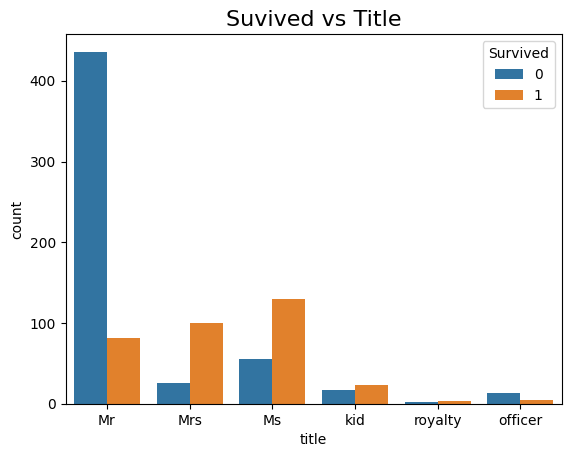

In [15]:
# Grouping Title
new_title = {
    'Mr' : 'Mr','Ms' : 'Ms','Mrs' : 'Mrs','Rev' : 'officer','Sir' : 'royalty','theCountess' : 'royalty','Dona' : 'royalty','Capt' : 'officer','Col' : 'officer','Don' : 'royalty','Dr' : 'officer','Jonkheer' : 'royalty','Lady' : 'royalty','Major' : 'officer','Master' : 'kid','Miss' : 'Ms','Mlle' : 'Ms','Mme' : 'Mrs'
}

#Add Title
def add_title(df):
    df['title'] = df['Name'].apply(lambda x: x.split(",")[1])
    df['title'] = df['title'].apply(lambda x: x.split(".")[0])
    df.title = df.title.str.replace(' ', '')

add_title(df)

# Group Title
df['title'] = df['title'].apply(lambda x: new_title[x])
# display(pd.DataFrame(df.groupby('title')['PassengerId'].nunique()))

sns.countplot(x = 'title', data = df, hue = 'Survived')
plt.title('Suvived vs Title', fontsize = 16)

<ipython-input-16-cde44bc9ecc5>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  age = np.float(age_df[(age_df['title'] == title) & (age_df["Sex"] == sex) & (age_df['Pclass'] == pclass)]["Age"])


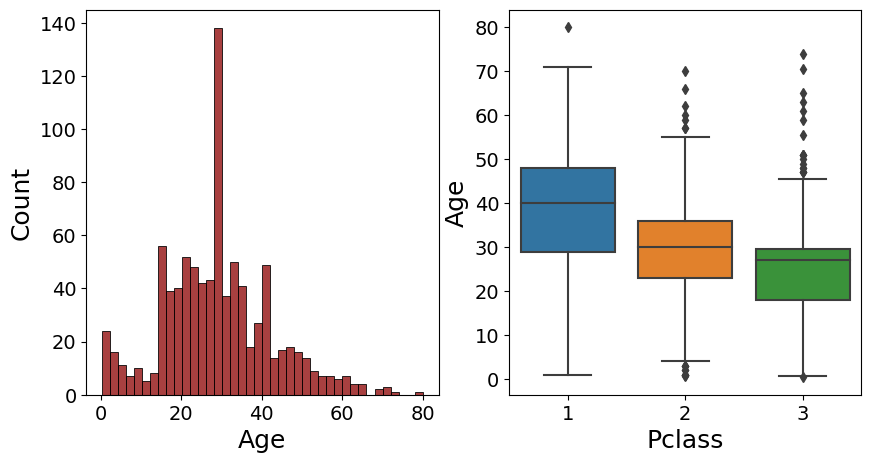

In [16]:
# Function to Update missing age values
def update_age(params):
    pclass = params[0]
    title = params[1]
    sex = params[2]
    age = params[3]
    if pd.isnull(age):
        age = np.float(age_df[(age_df['title'] == title) & (age_df["Sex"] == sex) & (age_df['Pclass'] == pclass)]["Age"])
    return age

# Dataframe to group age across Pclass, Title and Sex
age_df = df.groupby(['Pclass','title','Sex']).Age.mean().reset_index()

# Fill missing age
df['Age'] = df[['Pclass', 'title', 'Sex', 'Age']].apply(lambda x: update_age(x), axis = 1)

f, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.histplot(df.Age.dropna(), kde=False, color='darkred', bins=40, ax = ax[0])
# ax[0].set_title('Distribution of Age data', fontsize = 16)

sns.boxplot(x = 'Pclass', y = 'Age', data = df, ax = ax[1])
# ax[1].set_title('Age vs Pclass', fontsize  = 16)

for a in ax:
    a.tick_params(axis='both', which='major', labelsize=14)
    a.set_xlabel(a.get_xlabel(), fontsize=18)
    a.set_ylabel(a.get_ylabel(), fontsize=18)

#### Cabin
Cabin has 77 % of it's data missing.

In [17]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Creating a new cabin class = 'Z'.
Replacing the nan value with it and removing the numbers from the given class just taking the alphabet.

In [18]:
df['Cabin'] = df['Cabin'].fillna('Z')
df['Cabin'] = df['Cabin'].apply(lambda s: s[0])
df.loc[train[df['Cabin']=='T'].index,'Cabin']='A'

Visualizing the new Cabin data

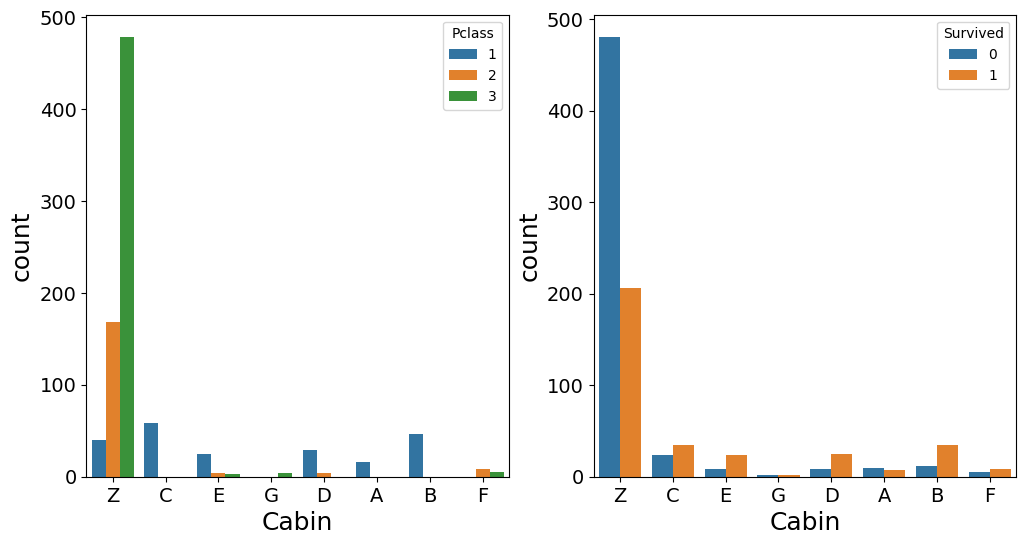

In [19]:
f, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.countplot(x = 'Cabin', data = df, hue = 'Pclass', ax = ax[0])
# ax[0].set_title('New Cabin data VS Pclass', fontsize = 16)
sns.countplot(x = 'Cabin', data = df, hue = 'Survived', ax = ax[1])
# ax[1].set_title('New Cabin data VS Survived', fontsize = 16)

for a in ax:
    a.tick_params(axis='both', which='major', labelsize=14)
    a.set_xlabel(a.get_xlabel(), fontsize=18, rotation = 0)
    a.set_ylabel(a.get_ylabel(), fontsize=18, rotation = 90)

plt.show()

After visualizing the cabin data with respect to Pclass and survived features, we found out that most of the people with 'Z' cabin class belonged to the Pclass 3 and had less chances of survival. People from the other cabin class were majorly from Pclass 1 and had a better chance of survival. Among cabin class A, B, C, D, E, and F A had the lowest chance of survival while others were better off. This indicates that Pclass might be a factor resulting in higher chances of survival,

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               891 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             891 non-null    object 
 11  Embarked          889 non-null    object 
 12  Ticket_frequency  891 non-null    int64  
 13  Fam_Size          891 non-null    int64  
 14  FsizeD            891 non-null    object 
 15  title             891 non-null    object 
dtypes: float64(2), int64(7), object(7)
memory us

#### Analyzing the role 'Embarked'

In [21]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Text(0.5, 1.0, 'Embarked VS Pclass')

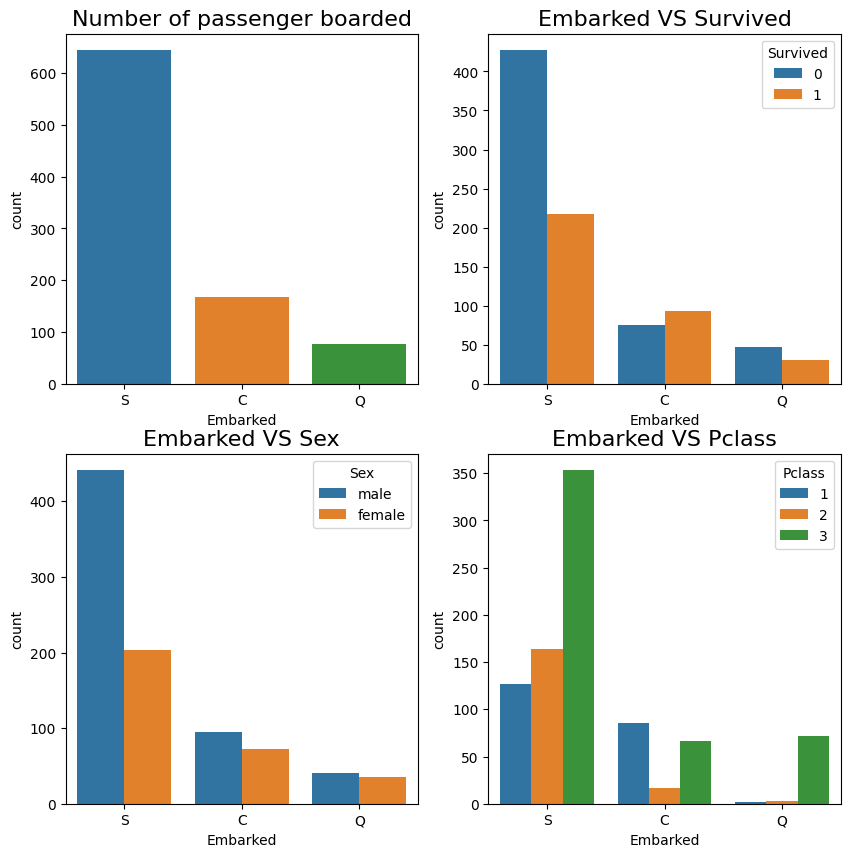

In [22]:
f, ax = plt.subplots(2, 2, figsize = (10, 10))
sns.countplot(x = 'Embarked', data = df, ax = ax[0, 0])
ax[0, 0].set_title('Number of passenger boarded', fontsize = 16)
sns.countplot(x = 'Embarked', data = df, hue = 'Survived', ax = ax[0, 1])
ax[0, 1].set_title('Embarked VS Survived', fontsize = 16)
sns.countplot(x = 'Embarked', data = df, hue = 'Sex', ax = ax[1, 0])
ax[1, 0].set_title('Embarked VS Sex', fontsize = 16)
sns.countplot(x = 'Embarked', data = df, hue = 'Pclass', ax = ax[1, 1])
ax[1, 1].set_title('Embarked VS Pclass', fontsize = 16)

1. From the above graph it is clear that maximum people boarded from port S and among those people around 75% were men and around same proportion of people could not survived. Also from plot between embarked and Pclass it is clear that most of the who boarded at S were in 3rd class.

2. People who boarded from port C have the max survival to death ration, also most of the poeple were in class 1st and 2nd.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               891 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             891 non-null    object 
 11  Embarked          889 non-null    object 
 12  Ticket_frequency  891 non-null    int64  
 13  Fam_Size          891 non-null    int64  
 14  FsizeD            891 non-null    object 
 15  title             891 non-null    object 
dtypes: float64(2), int64(7), object(7)
memory us

#### Converting into Dummies

In [24]:
dummies = pd.get_dummies(df['Embarked'],drop_first=True)

df = pd.concat([df.drop('Embarked',axis=1),dummies],axis=1)

In [25]:
dummies = pd.get_dummies(df['Cabin'],drop_first=True)

df = pd.concat([df.drop('Cabin',axis=1),dummies],axis=1)

In [26]:
dummies = pd.get_dummies(df['Sex'],drop_first=True)

df = pd.concat([df.drop('Sex',axis=1),dummies],axis=1)

In [27]:
dummies = pd.get_dummies(df['title'],drop_first=True)

df = pd.concat([df.drop('title',axis=1),dummies],axis=1)

In [28]:
dummies = pd.get_dummies(df['FsizeD'],drop_first=True)

df = pd.concat([df.drop('FsizeD',axis=1),dummies],axis=1)

In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Ticket_frequency', 'Fam_Size', 'Q', 'S', 'B', 'C',
       'D', 'E', 'F', 'G', 'Z', 'male', 'Mrs', 'Ms', 'kid', 'officer',
       'royalty', 'Big', 'Small'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Age               891 non-null    float64
 5   SibSp             891 non-null    int64  
 6   Parch             891 non-null    int64  
 7   Ticket            891 non-null    object 
 8   Fare              891 non-null    float64
 9   Ticket_frequency  891 non-null    int64  
 10  Fam_Size          891 non-null    int64  
 11  Q                 891 non-null    uint8  
 12  S                 891 non-null    uint8  
 13  B                 891 non-null    uint8  
 14  C                 891 non-null    uint8  
 15  D                 891 non-null    uint8  
 16  E                 891 non-null    uint8  
 1

In [31]:
df.drop(['Name', 'Ticket'], axis = 1, inplace = True)

<Axes: >

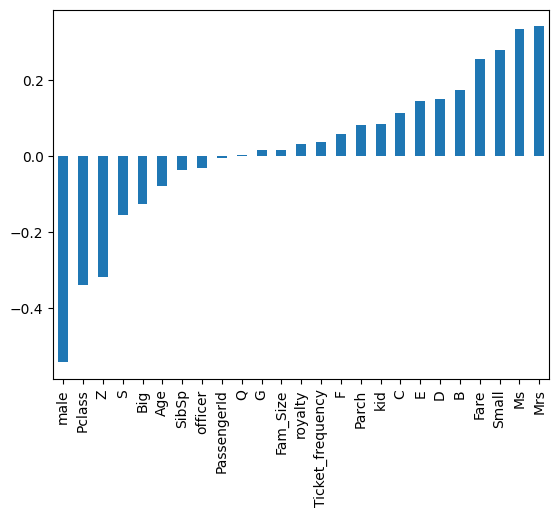

In [32]:
df.corr()['Survived'].sort_values().drop('Survived').plot(kind='bar')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Age               891 non-null    float64
 4   SibSp             891 non-null    int64  
 5   Parch             891 non-null    int64  
 6   Fare              891 non-null    float64
 7   Ticket_frequency  891 non-null    int64  
 8   Fam_Size          891 non-null    int64  
 9   Q                 891 non-null    uint8  
 10  S                 891 non-null    uint8  
 11  B                 891 non-null    uint8  
 12  C                 891 non-null    uint8  
 13  D                 891 non-null    uint8  
 14  E                 891 non-null    uint8  
 15  F                 891 non-null    uint8  
 16  G                 891 non-null    uint8  
 1

In [34]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_frequency,Fam_Size,Q,...,G,Z,male,Mrs,Ms,kid,officer,royalty,Big,Small
0,1,0,3,22.0,1,0,7.2500,1,2,0,...,0,1,1,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,2,0,...,0,0,0,1,0,0,0,0,0,1
2,3,1,3,26.0,0,0,7.9250,1,1,0,...,0,1,0,0,1,0,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,2,2,0,...,0,0,0,1,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,1,0,...,0,1,1,0,0,0,0,0,0,0


### Building a Logistic Model (Training and Predicting)

In [35]:
X_train, X_val, y_train, y_val = train_test_split(df.drop('Survived',axis=1), df['Survived'], test_size=0.30, random_state=101)

In [36]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
predictions = logmodel.predict(X_val)

In [38]:
accuracy=confusion_matrix(y_val,predictions)

In [39]:
accuracy

array([[138,  16],
       [ 37,  77]])

### Evaluation of the validation set

In [40]:
accuracy=accuracy_score(y_val,predictions)
accuracy

0.8022388059701493

In [41]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       154
           1       0.83      0.68      0.74       114

    accuracy                           0.80       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.80      0.80       268





---



---



# Using the Model in Test data to Predict

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [43]:
dft = test

### Handling Missing data

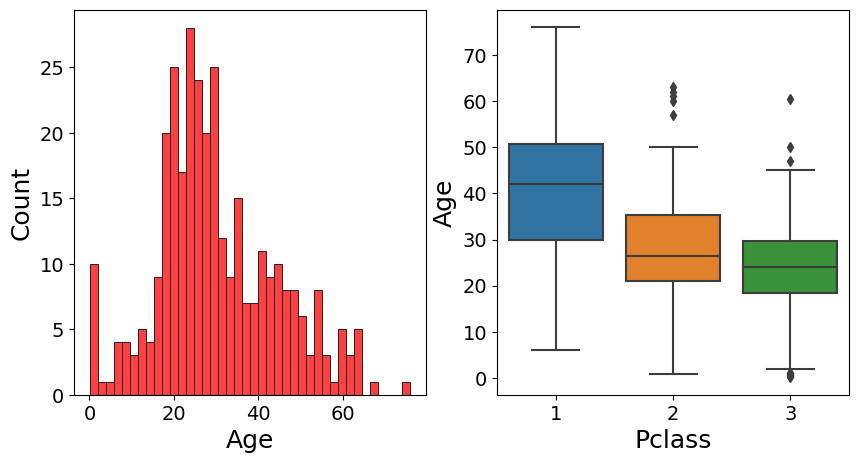

In [44]:
f, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.histplot(dft.Age.dropna(), kde=False, color='red', bins=40, ax = ax[0])
# ax[0].set_title('Distribution of Age data', fontsize = 16)

sns.boxplot(x = 'Pclass', y = 'Age', data = dft, ax = ax[1])
# ax[1].set_title('Age vs Pclass', fontsize  = 16)

for a in ax:
    a.tick_params(axis='both', which='major', labelsize=14)
    a.set_xlabel(a.get_xlabel(), fontsize=18, rotation = 0)
    a.set_ylabel(a.get_ylabel(), fontsize=18, rotation = 90)

In [45]:
# Grouping Title
new_title = {
    'Mr' : 'Mr','Ms' : 'Ms','Mrs' : 'Mrs','Rev' : 'officer','Sir' : 'royalty','theCountess' : 'royalty','Dona' : 'royalty','Capt' : 'officer','Col' : 'officer','Don' : 'royalty','Dr' : 'officer','Jonkheer' : 'royalty','Lady' : 'royalty','Major' : 'officer','Master' : 'kid','Miss' : 'Ms','Mlle' : 'Ms','Mme' : 'Mrs'
}

#Add Title
def add_title(df):
    df['title'] = df['Name'].apply(lambda x: x.split(",")[1])
    df['title'] = df['title'].apply(lambda x: x.split(".")[0])
    df.title = df.title.str.replace(' ', '')

add_title(dft)

# Group Title
dft['title'] = dft['title'].apply(lambda x: new_title[x])

<ipython-input-46-06e03c71d2e9>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  age = np.float(age_df[(age_df['title'] == title) & (age_df["Sex"] == sex) & (age_df['Pclass'] == pclass)]["Age"])


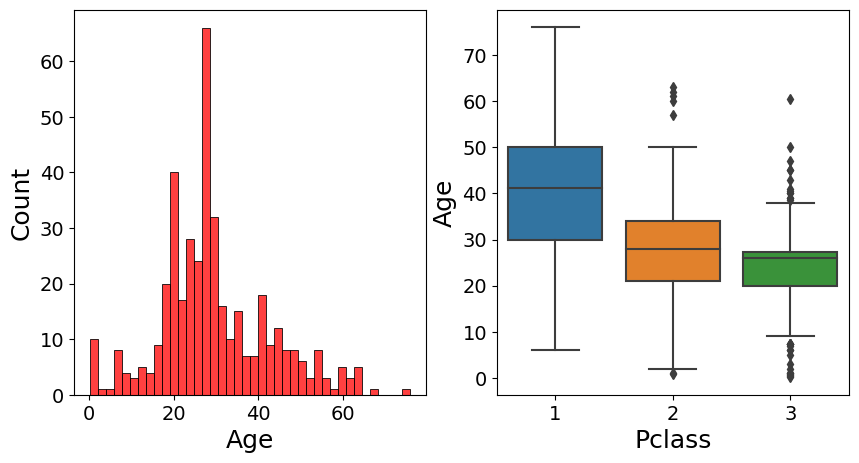

In [46]:
# Function to Update missing age values
def update_age(params):
    pclass = params[0]
    title = params[1]
    sex = params[2]
    age = params[3]
    if pd.isnull(age):
        age = np.float(age_df[(age_df['title'] == title) & (age_df["Sex"] == sex) & (age_df['Pclass'] == pclass)]["Age"])
    return age

# Dataframe to group age across Pclass, Title and Sex
age_df = dft.groupby(['Pclass','title','Sex']).Age.mean().reset_index()

# Fill missing age
dft['Age'] = dft[['Pclass', 'title', 'Sex', 'Age']].apply(lambda x: update_age(x), axis = 1)

f, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.histplot(dft.Age.dropna(), kde=False, color='red', bins=40, ax = ax[0])
# ax[0].set_title('Distribution of Age data', fontsize = 16)

sns.boxplot(x = 'Pclass', y = 'Age', data = dft, ax = ax[1])
# ax[1].set_title('Age vs Pclass', fontsize  = 16)

for a in ax:
    a.tick_params(axis='both', which='major', labelsize=14)
    a.set_xlabel(a.get_xlabel(), fontsize=18, rotation = 0)
    a.set_ylabel(a.get_ylabel(), fontsize=18, rotation = 90)

In [47]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  title        418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [48]:
dft['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

Creating a new cabin class = 'Z'.
Replacing the nan value with it and removing the numbers from the given class just taking the alphabet.

In [49]:
dft['Cabin'] = dft['Cabin'].fillna('Z')
dft['Cabin'] = dft['Cabin'].apply(lambda s: s[0])
dft.loc[dft[dft['Cabin']=='T'].index,'Cabin']='A'

In [50]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  title        418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [51]:
med = dft.Fare.mean()
dft.Fare.fillna(med, inplace = True)

In [52]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  title        418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


### Making the required features

In [53]:
dft['Ticket_frequency'] = dft.groupby('Ticket')['Ticket'].transform('count')

In [54]:
dft['Fam_Size'] = dft['Parch'] + dft['SibSp'] + 1
dft.loc[:,'FsizeD']='Alone'
dft.loc[(dft['Fam_Size']>1),'FsizeD']='Small'
dft.loc[(dft['Fam_Size']>4),'FsizeD']='Big'

In [55]:
dummies = pd.get_dummies(dft['Embarked'],drop_first=True)

dft = pd.concat([dft.drop('Embarked',axis=1),dummies],axis=1)

In [56]:
dummies = pd.get_dummies(dft['Cabin'],drop_first=True)

dft = pd.concat([dft.drop('Cabin',axis=1),dummies],axis=1)

In [57]:
dummies = pd.get_dummies(dft['Sex'],drop_first=True)

dft = pd.concat([dft.drop('Sex',axis=1),dummies],axis=1)

In [58]:
dummies = pd.get_dummies(dft['title'],drop_first=True)

dft = pd.concat([dft.drop('title',axis=1),dummies],axis=1)

In [59]:
dummies = pd.get_dummies(dft['FsizeD'],drop_first=True)

dft = pd.concat([dft.drop('FsizeD',axis=1),dummies],axis=1)

In [60]:
dft.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [61]:
dft.isnull().sum()

PassengerId         0
Pclass              0
Age                 0
SibSp               0
Parch               0
Fare                0
Ticket_frequency    0
Fam_Size            0
Q                   0
S                   0
B                   0
C                   0
D                   0
E                   0
F                   0
G                   0
Z                   0
male                0
Mrs                 0
Ms                  0
kid                 0
officer             0
royalty             0
Big                 0
Small               0
dtype: int64

In [62]:
dft.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Ticket_frequency', 'Fam_Size', 'Q', 'S', 'B', 'C', 'D', 'E', 'F', 'G',
       'Z', 'male', 'Mrs', 'Ms', 'kid', 'officer', 'royalty', 'Big', 'Small'],
      dtype='object')

Building a Logistic Model & Evaluation

In [63]:
logmodel = LogisticRegression()
logmodel.fit(df.drop('Survived',axis=1), df['Survived'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
predictions = logmodel.predict(dft)

In [65]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Adding the new columns as Survived Column

In [66]:
dft['Survived'] = predictions

In [67]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       418 non-null    int64  
 1   Pclass            418 non-null    int64  
 2   Age               418 non-null    float64
 3   SibSp             418 non-null    int64  
 4   Parch             418 non-null    int64  
 5   Fare              418 non-null    float64
 6   Ticket_frequency  418 non-null    int64  
 7   Fam_Size          418 non-null    int64  
 8   Q                 418 non-null    uint8  
 9   S                 418 non-null    uint8  
 10  B                 418 non-null    uint8  
 11  C                 418 non-null    uint8  
 12  D                 418 non-null    uint8  
 13  E                 418 non-null    uint8  
 14  F                 418 non-null    uint8  
 15  G                 418 non-null    uint8  
 16  Z                 418 non-null    uint8  
 1

#### Adding survived column in main data set

In [68]:
test['Survived'] = dft['Survived']

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,6))
dft['Survived'].value_counts().plot.pie(ax = ax[0], explode=[0,0.1],autopct='%1.1f%%',shadow=True, textprops={'fontsize': 16})
ax[0].set_title('Survived', fontsize=16)
ax[0].set_ylabel('')

sns.countplot(x = 'Survived',data = dft, ax=ax[1])
ax[1].set_title('Survived', fontsize=16)

for a in ax:
    a.tick_params(axis='both', which='major', labelsize=14)
    a.set_xlabel(a.get_xlabel(), fontsize=18)
    a.set_ylabel(a.get_ylabel(), fontsize=18)

plt.show()

In [ ]:
f, ax = plt.subplots(3, 2, figsize = (16, 10))
plt.subplots_adjust(hspace=0.4)
sns.countplot(x = 'Survived', data = dft,hue = 'Pclass', ax = ax[0, 0])
ax[0, 0].set_title('Pclass vs Survived', fontsize = 16)
sns.countplot(x = 'Survived', data = dft, hue = 'SibSp', ax = ax[0, 1])
ax[0, 1].set_title('SibSp VS Survived', fontsize = 16)
sns.countplot(x = 'Survived', data = dft, hue = 'Parch', ax = ax[1, 0])
ax[1, 0].set_title('Parch VS Survived', fontsize = 16)
sns.countplot(x = 'Survived', data = dft, hue = 'Ticket_frequency', ax = ax[1, 1])
ax[1, 1].set_title('Ticket frequency VS Survival', fontsize = 16)
sns.countplot(x = 'Survived', data = dft, hue = 'Fam_Size', ax = ax[2, 0])
ax[2, 0].set_title('Family Size VS Survival', fontsize = 16)
sns.countplot(x = 'Survived', data = test, hue = 'Sex', ax = ax[2,1])
ax[2, 1].set_title('Sex VS Survival', fontsize = 16)